In [1]:
# Nonlinear MPC test using kinematic bicycle model for car
# We want to use the kinematic bicycle model from this paper (Figure 3)
# https://link-springer-com.stanford.idm.oclc.org/article/10.1007/s13177-020-00226-1#Tab4

# which has states:
# x, y = positional coordinates in inertial frame
# ψ = angle of car centerline in inertial frame
# ̇ψ = change of angle
# β = angle between car centerline and velocity vector
# ̇β = change of angle

# and has the equations:
# ̇x = v cos(ψ + β)
# ̇y = v sin(ψ + β)
# ̇v = a
# ̇ψ = v / lᵣ sin(β)
# β = arctan(lᵣ/(lf + lᵣ) tan(δf))
# ̇β = v/(lf + lᵣ) tan(δf) - v/lᵣ sin(β)
# ̇δf = ω

# and we want to solve it. Define the model:


The model has state and input:
\begin{gather*}
z = \begin{bmatrix}x\\ y\\ v\\ \psi\\ \beta\end{bmatrix},\quad
u = \begin{bmatrix}a\\ \delta_f\end{bmatrix},\quad
\end{gather*}
where the two control signals are $a$, the acceleration command, and $\delta_f$, the front steering angle (in radians).
The nonlinear model is:
\begin{gather*}
\begin{bmatrix}
\dot x\\ \dot y\\ \dot v\\ \dot\psi\\ \dot\beta
\end{bmatrix} =
\begin{bmatrix}
v\cos(\psi + \beta)
\\
v\sin(\psi + \beta)
\\
a
\\
\frac{v}{l_r}\sin(\beta)
\\
\frac{v}{l_f + l_r}\tan(\delta_f) - \frac{v}{l_r}\sin(\beta)
\end{bmatrix}
\end{gather*}

## Casadi setup
From http://casadi.sourceforge.net/v3.4.4/users_guide/casadi-users_guide.pdf

In [2]:
import numpy as np
import casadi
from direct_collocation import MpcProblem
from KinematicBicycleCar import KinematicBicycleCar

In [3]:
# Set up a visualization

import matplotlib.pyplot as plt
import matplotlib as mpl



In [4]:
car = KinematicBicycleCar(N=30, step=0.05)
        
ic = [0.0, 0.0, 5.5, np.pi/8, 0.0]
car.set_initial(ic)

# Cost
cost = (car.dae.x[0][2]-5)**2

In [5]:
    
mpcprob = MpcProblem(car,     # casadi.DaeBuilder()
                     cost,        # casadi symbolic objective
                    )
uk = [0.0,0.0]

n_runs = 20
x_plan = np.empty((mpcprob.model.n,n_runs+1))
u_plan = np.empty((mpcprob.model.m,n_runs))
x_true = np.empty((mpcprob.model.n,n_runs+1))
x_true[:,0] = ic
x_plan[:,0] = ic

for k in range(n_runs):
    xk_opt, uk_opt = mpcprob.run(x_true[:,k])
    for i in range(5):
        x_plan[i,k+1] = xk_opt[i][1]
    for i in range(2):
        u_plan[i,k] = uk_opt[i][1]
    x_true[:,k+1] = mpcprob.simulate(x_true[:,k], u_plan[:,k])
    
    # hack, test changing cost
    if k > 10:
        mpcprob.set_cost(100*car.dae.x[0][2]**2)

#for k in range(1,n_runs):
    #print("True:", x_true[:,k])
    #print("Pred:", x_plan[:,k])
    #print("Error:", np.linalg.norm(x_true[:,k]-x_plan[:,k],2))


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     3520
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      660

Total number of variables............................:      660
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      660
                     variables with only upper bounds:        0
Total number of equa

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     3520
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      660

Total number of variables............................:      660
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      660
                     variables with only upper bounds:        0
Total number of equality constraints.................:      600
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     3520
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      660

Total number of variables............................:      660
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      660
                     variables with only upper bounds:        0
Total number of equality constraints.................:      600
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     3520
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      660

Total number of variables............................:      660
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      660
                     variables with only upper bounds:        0
Total number of equality constraints.................:      600
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     3520
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      660

Total number of variables............................:      660
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      660
                     variables with only upper bounds:        0
Total number of equality constraints.................:      600
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

   6  3.1317838e+01 1.63e+01 1.62e+01  -1.0 1.51e+01    -  7.11e-02 1.76e-01f  1
   7  2.8441071e+01 1.23e+01 1.22e+01  -1.0 1.15e+01    -  1.04e-01 2.42e-01f  1
   8  2.4619947e+01 7.75e+00 7.53e+00  -1.0 7.54e+00    -  1.61e-01 3.71e-01f  1
   9  1.9032954e+01 1.82e+00 1.49e+00  -1.0 3.74e+00    -  3.16e-01 7.65e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  1.5684283e+01 6.46e-04 9.44e-01  -1.0 6.66e-01    -  6.76e-01 1.00e+00f  1
  11  9.2506869e+00 1.33e-02 7.57e-01  -1.0 3.17e+00    -  3.69e-01 1.00e+00f  1
  12  3.1770799e+00 6.04e-03 2.29e-01  -1.0 8.09e+00    -  6.08e-01 7.83e-01f  1
  13  3.7643650e-01 1.66e-03 8.58e-02  -1.7 3.40e+00    -  6.37e-01 1.00e+00f  1
  14  7.7082455e-03 3.34e-04 7.86e-03  -1.7 3.11e+00    -  1.00e+00 1.00e+00f  1
  15  4.4526542e-03 4.15e-06 1.66e-04  -2.5 3.99e-01    -  1.00e+00 1.00e+00h  1
  16  1.8153425e-03 4.51e-06 9.33e-04  -3.8 1.14e+00    -  8.53e-01 1.00e+00h  1
  17  1.7586623e-03 4.35e-09

   4  1.4246727e+01 2.38e+01 2.37e+01  -1.0 2.44e+01    -  4.03e-02 8.88e-02h  1
   5  3.2856085e+01 2.14e+01 2.12e+01  -1.0 2.11e+01    -  5.31e-02 1.05e-01h  1
   6  6.7649423e+01 1.86e+01 1.83e+01  -1.0 1.73e+01    -  6.69e-02 1.31e-01h  1
   7  1.2167310e+02 1.57e+01 1.55e+01  -1.0 1.48e+01    -  8.86e-02 1.52e-01h  1
   8  2.0262877e+02 1.28e+01 1.26e+01  -1.0 1.25e+01    -  1.24e-01 1.86e-01h  1
   9  3.1926501e+02 9.75e+00 9.56e+00  -1.0 9.92e+00    -  1.86e-01 2.39e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  4.7836836e+02 6.61e+00 6.48e+00  -1.0 7.43e+00    -  3.24e-01 3.22e-01h  1
  11  6.8419758e+02 3.45e+00 3.38e+00  -1.0 5.25e+00    -  4.85e-01 4.78e-01h  1
  12  8.7456839e+02 1.06e+00 1.05e+00  -1.0 3.29e+00    -  7.57e-01 6.94e-01h  1
  13  9.6877415e+02 2.13e-04 1.80e-02  -1.0 1.87e+00    -  1.00e+00 1.00e+00h  1
  14  9.6528849e+02 5.78e-06 4.49e-02  -2.5 9.78e-01    -  8.37e-01 1.00e+00f  1
  15  9.6493062e+02 6.49e-07

 102  9.6468711e+02 2.08e-14 1.52e-06  -8.6 1.90e-07   0.9 1.00e+00 1.00e+00h  1
 103  9.6468711e+02 1.40e-14 1.52e-06  -8.6 5.66e-07   0.4 1.00e+00 1.00e+00h  1
 104  9.6468711e+02 1.16e-14 1.47e-06  -8.6 4.93e-06  -0.5 1.00e+00 1.00e+00h  1
 105  9.6468711e+02 1.15e-14 1.15e-06  -8.6 3.48e-05  -1.5 1.00e+00 1.00e+00h  1
 106  9.6468711e+02 1.59e-14 1.11e-06  -8.6 4.74e-06  -0.6 1.00e+00 1.00e+00h  1
 107  9.6468711e+02 1.32e-14 1.07e-06  -8.6 5.10e-06  -0.7 1.00e+00 1.00e+00h  1
 108  9.6468711e+02 1.66e-14 1.07e-06  -8.6 2.39e-07   0.6 1.00e+00 1.00e+00h  1
 109  9.6468711e+02 1.30e-14 1.06e-06  -8.6 7.12e-07   0.2 1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110  9.6468711e+02 1.45e-14 1.06e-06  -8.6 2.66e-07   0.6 1.00e+00 1.00e+00h  1
 111  9.6468711e+02 1.05e-14 1.06e-06  -8.6 9.98e-08   1.0 1.00e+00 1.00e+00h  1
 112  9.6468711e+02 1.19e-14 1.05e-06  -8.6 2.99e-07   0.5 1.00e+00 1.00e+00h  1
 113  9.6468711e+02 1.52e-14

  61  8.3333298e+02 1.56e-14 4.33e-07  -8.6 7.62e-05  -2.2 1.00e+00 1.00e+00h  1
  62  8.3333298e+02 1.34e-14 4.15e-07  -8.6 1.28e-06  -0.5 1.00e+00 1.00e+00h  1
  63  8.3333298e+02 1.85e-14 3.93e-07  -8.6 3.65e-06  -1.0 1.00e+00 1.00e+00h  1
  64  8.3333298e+02 1.25e-14 3.32e-07  -8.6 9.25e-06  -1.4 1.00e+00 1.00e+00h  1
  65  8.3333298e+02 1.74e-14 1.25e-07  -8.6 3.14e-05  -2.4 1.00e+00 1.00e+00h  1
  66  8.3333298e+02 1.57e-14 1.15e-07  -8.6 1.36e-06  -1.1 1.00e+00 1.00e+00h  1
  67  8.3333298e+02 1.93e-14 6.89e-08  -8.6 7.29e-06  -2.0 1.00e+00 1.00e+00h  1
  68  8.3333298e+02 1.57e-14 6.67e-08  -8.6 3.31e-07  -0.7 1.00e+00 1.00e+00h  1
  69  8.3333298e+02 1.23e-14 6.09e-08  -8.6 9.07e-07  -1.2 1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70  8.3333298e+02 1.71e-14 3.29e-08  -8.6 4.41e-06  -2.1 1.00e+00 1.00e+00h  1
  71  8.3333298e+02 1.76e-14 2.94e-08  -8.6 5.54e-07  -1.3 1.00e+00 1.00e+00H  1
  72  8.3333298e+02 9.48e-15

  68  7.1447885e+02 1.41e-14 7.41e-06  -8.6 2.94e-06   0.4 1.00e+00 1.00e+00h  1
  69  7.1447885e+02 1.32e-14 7.32e-06  -8.6 8.71e-06  -0.1 1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70  7.1447885e+02 1.32e-14 7.29e-06  -8.6 3.25e-06   0.4 1.00e+00 1.00e+00h  1
  71  7.1447885e+02 1.17e-14 7.28e-06  -8.6 1.22e-06   0.8 1.00e+00 1.00e+00h  1
  72  7.1447885e+02 1.39e-14 7.24e-06  -8.6 3.64e-06   0.3 1.00e+00 1.00e+00h  1
  73  7.1447885e+02 1.97e-14 6.95e-06  -8.6 3.14e-05  -0.7 1.00e+00 1.00e+00h  1
  74  7.1447885e+02 1.69e-14 5.05e-06  -8.6 2.05e-04  -1.6 1.00e+00 1.00e+00h  1
  75  7.1447885e+02 1.44e-14 4.89e-06  -8.6 2.80e-05  -0.8 1.00e+00 1.00e+00h  1
  76  7.1447885e+02 1.48e-14 4.57e-06  -8.6 2.94e-05  -0.8 1.00e+00 1.00e+00h  1
  77  7.1447885e+02 1.81e-14 4.56e-06  -8.6 1.38e-06   0.5 1.00e+00 1.00e+00h  1
  78  7.1447885e+02 1.54e-14 4.52e-06  -8.6 4.09e-06   0.0 1.00e+00 1.00e+00h  1
  79  7.1447885e+02 1.32e-14

  15  6.0752166e+02 7.22e-05 1.67e-06  -3.8 3.00e-01    -  1.00e+00 1.00e+00f  1
  16  6.0750505e+02 4.20e-06 2.14e-04  -5.7 1.40e-01    -  9.49e-01 9.42e-01h  1
  17  6.0750105e+02 1.03e-08 1.08e-08  -5.7 1.16e-01    -  1.00e+00 1.00e+00h  1
  18  6.0750010e+02 5.18e-09 7.67e-12  -5.7 5.65e-02    -  1.00e+00 1.00e+00f  1
  19  6.0749982e+02 1.53e-03 3.54e-03  -8.6 4.50e-01    -  6.42e-01 9.42e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  6.0749975e+02 1.10e-05 2.54e-02  -8.6 1.94e-02  -1.8 8.96e-01 1.00e+00h  1
  21  6.0749973e+02 3.63e-10 4.23e-04  -8.6 3.92e-03  -1.0 1.00e+00 1.00e+00h  1
  22  6.0749972e+02 5.63e-12 1.15e-03  -8.6 4.98e-04   0.4 1.00e+00 1.00e+00h  1
  23  6.0749972e+02 2.64e-11 5.37e-04  -8.6 2.10e-03  -0.6 1.00e+00 1.00e+00h  1
  24  6.0749972e+02 1.29e-13 6.09e-04  -8.6 1.12e-04   0.7 1.00e+00 1.00e+00h  1
  25  6.0749972e+02 2.66e-13 5.72e-04  -8.6 2.81e-04   0.3 1.00e+00 7.11e-01h  1
  26  6.0749972e+02 1.25e-14

 118  6.0749972e+02 1.28e-14 2.03e-06  -8.6 5.11e-07   0.6 1.00e+00 1.00e+00h  1
 119  6.0749972e+02 1.27e-14 2.00e-06  -8.6 1.51e-06   0.1 1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120  6.0749972e+02 1.86e-14 1.99e-06  -8.6 5.65e-07   0.5 1.00e+00 1.00e+00h  1
 121  6.0749972e+02 1.43e-14 1.97e-06  -8.6 1.68e-06   0.1 1.00e+00 1.00e+00h  1
 122  6.0749972e+02 1.06e-14 1.83e-06  -8.6 1.40e-05  -0.9 1.00e+00 1.00e+00h  1
 123  6.0749972e+02 1.46e-14 1.82e-06  -8.6 6.54e-07   0.4 1.00e+00 1.00e+00h  1
 124  6.0749972e+02 1.46e-14 1.82e-06  -8.6 2.45e-07   0.9 1.00e+00 1.00e+00h  1
 125  6.0749972e+02 2.15e-14 1.81e-06  -8.6 7.32e-07   0.4 1.00e+00 1.00e+00h  1
 126  6.0749972e+02 1.45e-14 1.75e-06  -8.6 6.36e-06  -0.6 1.00e+00 1.00e+00h  1
 127  6.0749972e+02 1.25e-14 1.75e-06  -8.6 2.98e-07   0.8 1.00e+00 1.00e+00h  1
 128  6.0749972e+02 1.51e-14 1.74e-06  -8.6 8.89e-07   0.3 1.00e+00 1.00e+00h  1
 129  6.0749972e+02 1.09e-14

  45  5.1177058e+02 1.69e-14 1.08e-05  -8.6 4.22e-04  -1.6 1.00e+00 1.00e+00h  1
  46  5.1177058e+02 1.68e-14 9.70e-06  -8.6 1.42e-04  -1.2 1.00e+00 1.00e+00h  1
  47  5.1177058e+02 1.21e-14 9.68e-06  -8.6 6.64e-06   0.2 1.00e+00 1.00e+00h  1
  48  5.1177058e+02 1.71e-14 9.46e-06  -8.6 1.95e-05  -0.3 1.00e+00 1.00e+00h  1
  49  5.1177058e+02 1.54e-14 9.38e-06  -8.6 7.25e-06   0.1 1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  50  5.1177058e+02 1.60e-14 9.17e-06  -8.6 2.13e-05  -0.4 1.00e+00 1.00e+00h  1
  51  5.1177058e+02 1.28e-14 7.67e-06  -8.6 1.60e-04  -1.3 1.00e+00 1.00e+00h  1
  52  5.1177058e+02 1.72e-14 6.34e-06  -8.6 1.49e-04  -1.4 1.00e+00 1.00e+00h  1
  53  5.1177058e+02 2.09e-14 6.34e-06  -8.6 6.97e-06  -0.0 1.00e+00 1.00e+00h  1
  54  5.1177058e+02 1.62e-14 6.12e-06  -8.6 2.02e-05  -0.5 1.00e+00 1.00e+00h  1
  55  5.1177058e+02 1.44e-14 4.77e-06  -8.6 1.42e-04  -1.5 1.00e+00 1.00e+00h  1
  56  5.1177058e+02 1.45e-14

  27  4.2666645e+02 9.95e-14 1.99e-04  -8.6 9.83e-04  -0.7 1.00e+00 1.00e+00h  1
  28  4.2666644e+02 1.13e-13 1.62e-03  -8.6 4.23e-03  -1.6 8.96e-01 2.29e-01h  1
  29  4.2666644e+02 6.69e-13 5.12e-04  -8.6 3.90e-03  -1.7 7.27e-01 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  30  4.2666644e+02 7.28e-14 6.76e-05  -8.6 1.27e-03  -1.3 1.00e+00 1.00e+00h  1
  31  4.2666644e+02 6.35e-14 5.58e-05  -8.6 1.18e-03  -1.3 1.00e+00 1.00e+00h  1
  32  4.2666644e+02 1.30e-14 5.54e-05  -8.6 5.49e-05   0.0 1.00e+00 1.00e+00h  1
  33  4.2666644e+02 1.02e-14 5.39e-05  -8.6 1.60e-04  -0.5 1.00e+00 1.00e+00h  1
  34  4.2666644e+02 1.74e-14 5.35e-05  -8.6 5.96e-05  -0.0 1.00e+00 1.00e+00h  1
  35  4.2666644e+02 1.19e-14 5.20e-05  -8.6 1.74e-04  -0.5 1.00e+00 1.00e+00h  1
  36  4.2666644e+02 1.66e-14 5.15e-05  -8.6 6.46e-05  -0.1 1.00e+00 1.00e+00h  1
  37  4.2666644e+02 1.17e-14 4.99e-05  -8.6 1.88e-04  -0.6 1.00e+00 1.00e+00h  1
  38  4.2666644e+02 1.98e-14

  15  3.5156941e+02 2.20e-07 9.15e-04  -5.7 1.62e-01    -  9.41e-01 9.10e-01f  1
  16  3.5156411e+02 1.38e-08 9.39e-04  -5.7 9.39e-02  -2.0 1.00e+00 1.00e+00f  1
  17  3.5156280e+02 3.58e-09 2.50e-04  -5.7 7.51e-02  -2.5 1.00e+00 1.00e+00f  1
  18  3.5156248e+02 7.34e-10 2.43e-04  -5.7 2.74e-02  -2.1 1.00e+00 1.00e+00h  1
  19  3.5156240e+02 5.68e-07 2.05e-08  -5.7 2.16e-02    -  1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  3.5156232e+02 2.81e-08 4.84e-04  -8.6 1.13e-02  -3.0 9.97e-01 9.51e-01h  1
  21  3.5156231e+02 4.10e-11 2.01e-02  -8.6 6.23e-03  -2.6 9.12e-01 1.00e+00f  1
  22  3.5156231e+02 5.23e-12 2.93e-04  -8.6 6.52e-04  -0.3 1.00e+00 1.00e+00h  1
  23  3.5156230e+02 3.08e-12 1.56e-04  -8.6 1.04e-03  -0.8 1.00e+00 1.00e+00h  1
  24  3.5156230e+02 3.82e-13 1.40e-04  -8.6 3.52e-04  -0.4 1.00e+00 1.00e+00h  1
  25  3.5156230e+02 1.75e-13 5.25e-05  -8.6 1.18e-03  -1.4 1.00e+00 1.00e+00h  1
  26  3.5156230e+02 3.05e-14

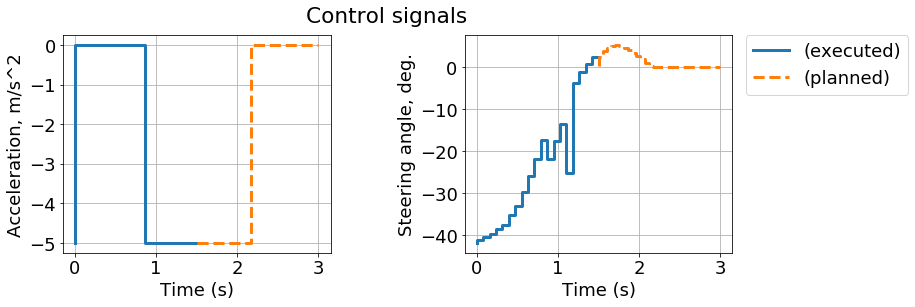

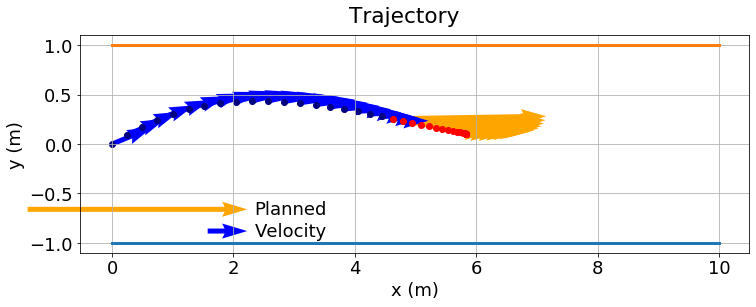

In [6]:
u_plt, u_ax1, u_ax2 = car.plot_u(u_plan, mpcprob.u_opt)
# control limits
x_plt, x_ax = car.plot_x(x_plan, mpcprob.x_opt)
x_ax.plot([0.0,10.0], [-1,-1]) # Road boundary (lower)
x_ax.plot([0.0,10.0], [1,1]) # (upper)
plt.show()

In [7]:
print("Final state:")
print("(x,y):", x_plan[0,-1], x_plan[1,-1])
print("v    :", x_plan[2])

Final state:
(x,y): 4.7894955413481455 0.23466059911499432
v    : [5.5        5.25000003 5.00000082 4.99999984 5.00000033 4.99999936
 5.00000058 4.99999815 5.00000032 4.99999997 5.00000005 4.99999964
 5.00000049 4.99999931 4.74999931 4.49999931 4.24999931 3.99999931
 3.74999931 3.49999931 3.24999931]


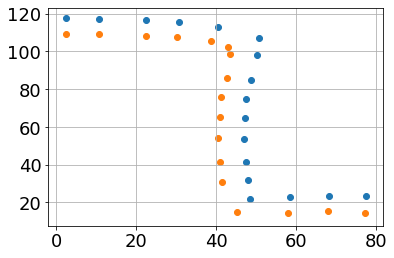

In [8]:
# This is the road to my parents' house, distances in meters.
''''''
road_left = np.array([
[2.519, 117.514],
[10.68, 117.192],
[22.303, 116.549],
[30.712, 115.585],
[40.357, 112.691],
[50.744, 107.226],
[50.249, 98.224],
[48.765, 84.721],
[47.529, 74.754],
[47.158, 64.466],
[47.034, 53.535],
[47.529, 41.318],
[48.024, 31.994],
[48.518, 22.028],
[58.41, 22.671],
[68.303, 23.635],
[77.453, 23.153],
])

road_right = np.array([
[2.519, 109.155],
[10.68, 109.316],
[22.427, 108.19],
[30.094, 107.708],
[38.626, 105.297],
[42.83, 102.403],
[43.325, 98.545],
[42.583, 86.007],
[41.222, 75.719],
[40.852, 65.431],
[40.357, 53.856],
[40.852, 41.318],
[41.346, 30.869],
[45.179, 14.955],
[57.916, 14.312],
[68.056, 15.276],
[77.206, 14.312],
])

plt.scatter(road_left[:,0], road_left[:,1])


In [9]:
INITIAL_CONDITIONS = np.array([
    (road_right[0,0] + road_left[0,0])/2.0, # x, car starts in middle of road
    (road_right[0,1] + road_left[0,1])/2.0, #y, same
    11.0, # v, about 25 MPH = 11.17 m/s. This is a bit too fast.
    -np.pi/8, # psi, car is a bit crooked
    0.0 # beta
])

N_ROAD_POINTS = 17
